SMS Spam Detection Using NLP

In [44]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [45]:
#read the dataset
data  = pd.read_csv('spam.csv')

In [46]:
#view top 5 records
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [47]:
#view last 5 records
data.tail()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [48]:
#view random 5 records from dataset
data.sample(5)

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
108,ham,I know! Grumpy old people. My mom was like you...,NaN,NaN,NaN
3130,spam,LookAtMe!: Thanks for your purchase of a video...,NaN,NaN,NaN
765,spam,UR awarded a City Break and could WIN a �200 S...,NaN,NaN,NaN
4165,ham,Well if I'm that desperate I'll just call arma...,NaN,NaN,NaN
1315,ham,"Whenevr ur sad, Whenevr ur gray, Remembr im he...",NaN,NaN,NaN


In [49]:
#drop the unwanted attributes
data.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'},inplace=True)

In [50]:
#rename attributes
data.rename(columns={"class":"result","message":"input"},inplace=True)

In [51]:
data['result'].value_counts()

ham     4825
spam     747
Name: result, dtype: int64

In [52]:
#check for null values
data.isnull().sum()

result    0
input     0
dtype: int64

In [53]:
#check for duplicates count
data.duplicated().sum()

403

In [54]:
#remove duplicates
data = data.drop_duplicates()

In [55]:
#check if duplicates are removed
data.duplicated().sum() 

0

In [56]:
#check shape
data.shape

(5169, 2)

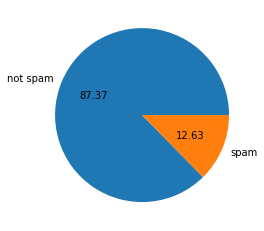

In [57]:
#plot a pie chart
plt.pie(data['result'].value_counts(),labels=['not spam','spam'],autopct='%0.2f')
plt.show()

In [58]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\shrir\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\shrir\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\shrir\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\shrir\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\shrir\AppData\Roaming\nltk_data...
[

True

In [59]:
#replace the ham with 0 and spam to 1
data = data.replace({'ham':0,'spam':1})

In [60]:
#download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
#function to clear stopwords and make everything lower case
stopwords = stopwords.words('English')
def transform_text(text):
    useFulWords = []
    text = text.lower()
    words = nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords:
            useFulWords.append(word)
    return " ".join(useFulWords)

In [65]:
transform_text('hii hshgs i am Mr juggish kumar are you hungry')


'hii hshgs mr juggish kumar hungry'